## Визуализация данных в Python

**Материал подготовила Арина Ситникова**

Теперь, когда мы рассмотрели основы препроцессинга данных в Python, используя библиотеки Numpy и Pandas, мы можем перейти к очень интересному, но при этом очень важному блоку, который составляет немалую часть работы специалистов в области data science.

Итак, в данном уроке мы научимся визуализировать данные. Визуализация данных помогает представить сложные наборы данных в простом и наглядном виде - так, чтобы даже непрофессионалам, не обладающим техническими знаниями, всё стало ясно и понятно. 

Когда датасет имеет низкую размерность (или же когда нашей целью является сравнение той или иной *пары* признаков), визуализация - отличный способ получить общее представление о данных, выявить предполагаемые тренды или даже, если повезёт, сделать определённые выводы о модели поведения данных.

Визуализация может наглядно показать, насколько хорошо работает обученная нами модель, присутствует ли недообучение или переобучение. Графики также являются хорошим инструментом для визуального поиска потенциальных выбросов (outliers). 

Мы рассмотрим две наиболее популярные библиотеки: matplotlib и seaborn:

- **Matplotlib**: один из наиболее часто используемых инструментов для построения графиков; данная библиотека отлично подходит для создания 2D и 3D визуализаций.
- **Seaborn**: был создан на основе matplotlib и больше ориентирован на построение статистических графиков. 

Обе библиотеки позволяют встраивать графики непосредственно в Jupyter notebooks, а также предоставляют возможность выводить/сохранять графики в виде отдельных файлов изображений (с расширением .png, .jpg и пр.);

### Matplotlib

Matplotlib был основан Джоном Хантером - нейробиологом, который хотел перенести визуализационные возможности MATLAB на Python (сам Хантер признавал, что matplotlib начинался с подражания графическим командам MATLAB). Действительно, хотя библиотека matplotlib построена на принципах ООП, она имеет процедурный интерфейс pylab, который предоставляет аналоги команд MATLAB.

Конечно, как и в случае любой другой библиотеки в Python, для использования matplotlib нам необходимо первым шагом импортировать данную библиотеку. Если мы хотим, чтобы графики выводились непосредственно в Jupyter notebook, а не в отдельном окне/вкладке, нам необходимо прописать отдельную команду:

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

Также не забудем импортировать уже знакомые нам библиотеки numpy и pandas:

In [2]:
import pandas as pd
import numpy as np

#### Введение. Базовые графики.

Начнём с построения простейшего графика. И хотя это занимает всего одну строчку кода, мы в результате не получаем практически никакого контроля над внешним видом графика. Но нужно с чего-то начинать!

Для начала, давайте создадим небольшой псево-датасет:

In [3]:
df1 = pd.DataFrame({'A':np.random.randint(75,200,50),'B':np.random.randint(0,25,50),'C':np.random.randint(-50,15,50)})
df1.head(10)

,A,B,C
0,170,14,2
1,107,22,-38
2,188,2,-26
3,176,8,7
4,136,3,-3
5,170,10,-23
6,83,22,-27
7,185,19,-21
8,119,5,14
9,75,9,-3


Мы можем построить график на основе одного столбца без всяких усились - необходимо лишь вызвать команду `.plot()`:

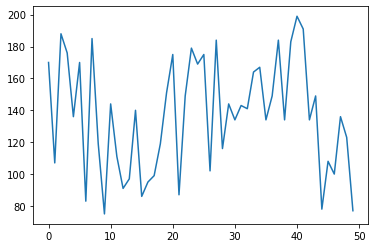

In [4]:
df1['A'].plot();

При использовании функции `.plot()` без уточнения дополнительных аргументов точки по умолчанию соединяются непрерывной ломаной линией. Тип графика можно изменить, передав аргумент *kind* внутрь функции (например, *kind = 'bar'* выведет на экран столбчатую диаграмму).  Стоит отметить, что если мы отдельно не укажем желаемый цвет линий, matplotlib сделает это за нас. 

Конечно, matplotlib не ограничивается построением графиков для одной лишь переменной. Мы можем визуализировать все переменные датафрейма одновременно:

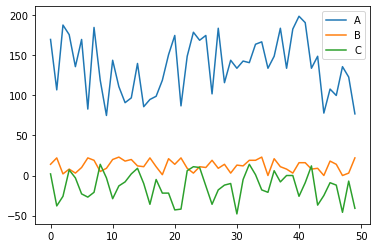

In [5]:
df1.plot();

Стандартные графики выглядят довольно просто и не слишком информативно, не так ли? К счастью, мы можем значительно изменить внешний вид графика, передав различные аргументы внутри функции - это включает в себя изменение цвета линий, добавление заголовка, легенды (обозначение линий) или названия оси, подпись данных и пр.:

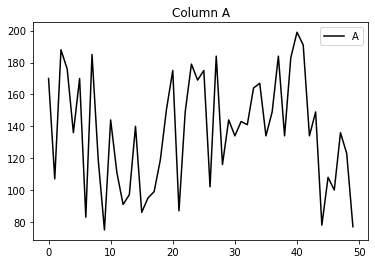

In [6]:
df1['A'].plot(title = 'Column A', legend = True, color = 'black');

Если же мы хотим взглянуть на каждое наблюдение по отдельности (например, для демонстрации наличия или отсутствия корреляции между двумя переменными), мы можем использовать функцию `plt.scatter()`, которая выведет на экран диаграмму рассеяния (scatter plot).

В отличие от линейной диаграммы `plt.plot()`, где можно передать лишь один аргумент - независимую переменную, `plt.scatter()` требует как минимум два аргумента: как независимую переменную (например, индекс или один из столбцов), так и зависимую переменную:

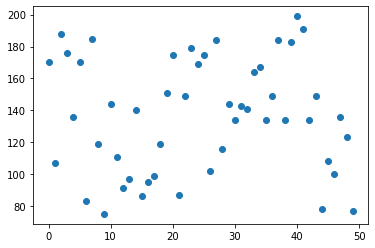

In [7]:
plt.scatter(df1.index, df1['A']);

#### Виды графиков и их использование

На данный момент мы рассмотрели два типа графиков: точечные диаграммы и линейные диаграммы. Как же мы можем решить, какой тип графика больше подходит для той или иной ситуации? Общие рекомендации следующие:

1. **Линейная диаграмма (line plot)** хорошо подойдёт для визуализации данных, где наблюдения каким-либо образом связаны между собой; например, изменение температуры в течение определённого времени.

2. **Диаграмма рассеяния (scatter plot)** может оказаться полезной в том случае, когда наблюдения не связаны между собой и могут восприниматься по отдельности. 

Вновь создадим искусственный датасет, где в качестве индекса будет использоваться площадь жилья, а в качестве переменной-признака - цена, и построим диаграмму рассеяния:

In [8]:
dfhp = pd.DataFrame({'House Price':[284, 302, 376, 372, 341, 385, 361, 345, 371, 317, 337, 404, 408, 367, 486, 402, 
                                    477, 475, 455, 456, 492, 515, 535, 567, 519, 580, 534, 539, 550, 618, 589, 624, 
                                    566, 630, 624, 596, 634, 639, 721, 690, 688, 751, 777, 798, 821, 781, 800, 797, 803, 
                                    898]}, index = [1710, 1737, 1767, 1779, 1791, 1810, 1819, 1825, 1869, 1896, 1963, 2047, 
                                                  2060, 2201, 2328, 2337, 2465, 2498, 2538, 2577, 2579, 2671, 2680, 2758, 
                                                  2831, 2866, 3018, 3053, 3084, 3106, 3133, 3143, 3156, 3159, 3169, 3247, 
                                                  3384, 3391, 3528, 3537, 3596, 3790, 3811, 3970, 4025, 4046, 4204, 4211, 
                                                  4274, 4410])
dfhp.index.name = 'Square Footage'
dfhp.head()

,House Price
Square Footage,
1710,284
1737,302
1767,376
1779,372
1791,341


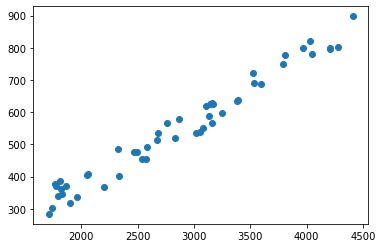

In [9]:
plt.scatter(dfhp.index, dfhp['House Price']);

Очевидно мы можем очень легко визуализировать данные, поскольку каждая точка показывает значение для конкретного дома, но при этом дома никак не связаны друг с другом - каждое наблюдение воспринимается как обособленное. 

Конечно, было бы намного сложнее воспринимать аналогичные данные в следующем виде:

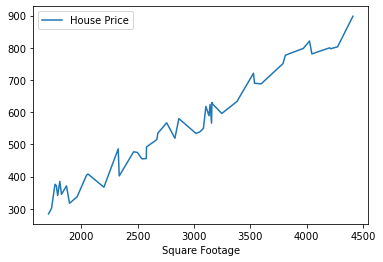

In [10]:
dfhp.plot();

Согласитесь, не слишком очевидно, о чём наши данные?

Однако если вернуться к примеру из определения линейной диаграммы (изменение температуры воздуха во времени), то подобный график будет восприниматься совершенно по-другому - здесь мы можем видеть определённую связь между точками наблюдений:

In [11]:
dftp = pd.DataFrame({'Temp':[10.1, 9.7, 10.4, 10.4, 12.2, 12.8, 13.3, 13.1, 13.8, 13.3, 14.6, 14.7, 14.1, 15.8, 15.8, 
                             16.2, 16.4, 16.0, 15.9, 17.9, 16.6, 17.5, 17.4, 18.2, 18.1, 17.3, 18.6, 18.7, 17.5, 17.2,
                             17.2, 17.3, 18.2, 17.9, 18.1, 17.7, 16.9, 18.3, 17.0, 16.3, 17.4, 15.7, 15.4, 15.2, 15.7,
                             15.7, 15.0, 14.0, 14.8]},
                    index = pd.date_range('2017-05-01 08:00:00',periods = 49,freq = '0.25H'))
dftp.head()

,Temp
2017-05-01 08:00:00,10.1
2017-05-01 08:15:00,9.7
2017-05-01 08:30:00,10.4
2017-05-01 08:45:00,10.4
2017-05-01 09:00:00,12.2


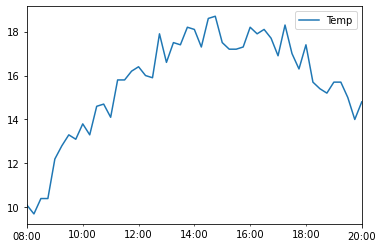

In [12]:
dftp.plot();

Библиотека matplotlib также позволяет строить столбчатые диаграммы. 

Стоит отметить, что если мы хотим визуализировать количественную переменную, традиционная столбчатая диаграмма (bar chart) не подойдёт. Bar charts отлично подходят для визуализации категориальных переменных (это такие переменные, которые имеют ограниченный набор *нечисловых* значений), поскольку каждая категория (значение) будет иметь свой уникальный столбец на оси x, и вы сможете легко увидеть разницу между категориями в зависимости от размера столбца.

Однако, если мы попытаемся построить столбчатую диаграмму для количественных данных, на оси х будет так много значений, что метки вдоль неё превратятся в беспорядочную кашу. Гистограмма, напротив, отлично показывает количественные соотношения некоторого показателя и будет весьма полезна для представления распределения данных. Другими словами, гистограмма - это график, который показывает, как часто каждое значение переменной появляется в наборе данных. В нашем последнем примере это будет показатель температуры воздуха.

Гистограмму можно построить как с помощью общей команды `plt.plot(kind = 'hist')`, так и напрямую с помощью `plt.hist()`. Ниже указаны оба способа:

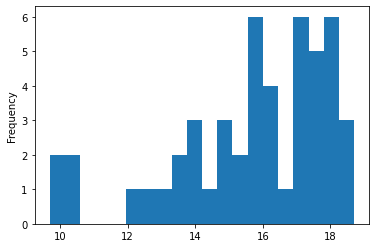

In [13]:
dftp['Temp'].plot(kind = 'hist', bins = 20);

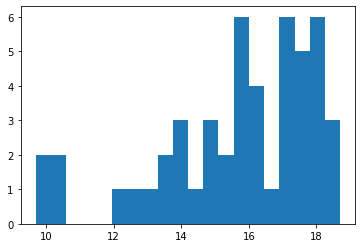

In [14]:
plt.hist(dftp['Temp'], bins = 20);

Гистограмма группирует числовые значения по диапазонам, т.е. она показывает частоту появления тех или иных значений в каждом интервале. Количество таких диапазонов регулируется аргументом *bins*.

Помимо видов диаграмм, рассмотренных выше, matplotlib предлагает огромное количество других типов графиков. Больше примеров можно найти здесь: https://matplotlib.org/gallery.html

#### Несколько графиков на одной диаграмме

Иногда может возникнуть необходимость сравнить целый ряд переменных. Конечно, мы не захотим листать несколько графиков, которые наверняка ещё будут в разных масштабах. Гораздо удобнее поместить сразу несколько диаграмм на один график. К нашему счастью, это сделать совсем несложно.

Вернёмся к самому первому датасету, который мы создали ещё в начале статьи. Допустим, мы хотим построить scatter plot для каждой переменной: A, B и C. Удивительно, но если мы запустим три *отдельные* команды построения диаграммы рассеяния, Python автоматически поместит диаграммы на один и тот же график, поскольку независимая переменная (в нашем случае - индекс) идентичная для всех столбцов:

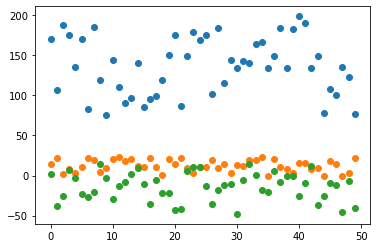

In [15]:
plt.scatter(df1.index,df1['A']);
plt.scatter(df1.index,df1['B']);
plt.scatter(df1.index,df1['C']);

Аналогичным образом мы можем построить линейную диаграмму:

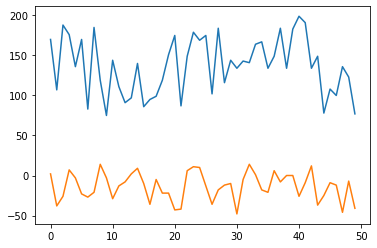

In [16]:
df1['A'].plot();
df1['C'].plot();

Конечно, данный код не выглядит слишком эффективным, ведь для каждой отдельной переменной нам приходится писать новую строку кода. В случае большого количества переменных наш код может стать громоздким (но при этом однотипным) и не слишком читаемым.

В случае линейного графика, однако, существует более элегантное решение: достаточно лишь указать список переменных/столбцов, которые мы хотим использовать для построения графика:

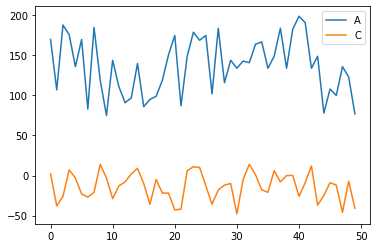

In [17]:
df1[['A','C']].plot();

Важно отметить, что если бы мы хотели построить два графика на основе двух *разных* датафреймов, Python не позволил бы нам это сделать и вывел бы две отдельные диаграммы: 

In [18]:
df = pd.DataFrame({'X':np.random.randint(0,100,30)},index = pd.date_range('2016-01-01',periods = 30,freq = 'h'))

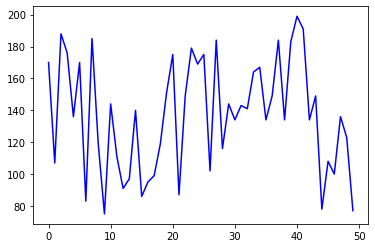

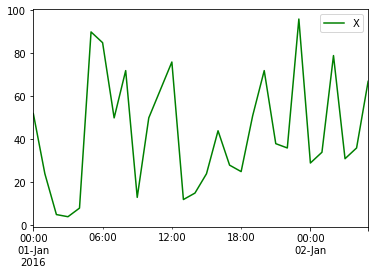

In [19]:
df1['A'].plot(color = 'blue');
df.plot(color = 'green');

#### Построение более продвинутых графиков

Несмотря на то, что matplotlib позволяет строить простейшие графики, требуя буквально одну строчку кода, мы очень часто хотим иметь больше контроля над внешним видом и форматом нашей диаграммы. Это, однако, требует немного больше работы, но мы и с этим справимся :) Код, конечно, становится куда более нетривиальным и объёмным:

```
fig = plt.figure()  # создание графика в качестве объекта  
plt.plot(x, y1, label = 'name1', color = 'colorname or hex code')
plt.plot(x, y2, label = 'name2', color = 'colorname or hex code')  # создаём нужное количество диаграмм,
# передавая желаемые аргументы (опционально)
plt.xlabel('label for x', size = number) # название оси x
plt.ylabel('label for y', size = number) # название оси y
plt.legend() # добавление легенды
plt.grid()  # данная функция рисует сетку на нашем графике
plt.title('Title') # заголовок диаграммы
plt.show() # выводим график на экран
```

Давайте вновь воспользуемся самым первым псевдо-датафреймом, чтобы создать диаграмму. Обозначим ось х как "Цена", ось у - как "Кол-во дней после первой сделки", а также зададим название графика - "Цена акций". Помимо этого, для лучшего восприятия диаграммы укажем параметр grid = True:

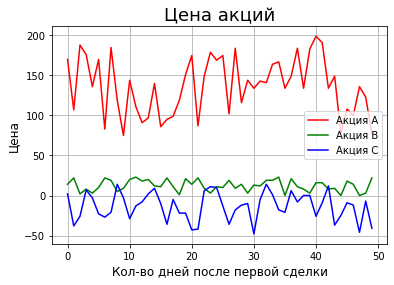

In [20]:
fig = plt.figure()
plt.plot(df1.index,df1['A'],label='Акция A', color='red')
plt.plot(df1.index,df1['B'],label='Акция B', color='green')
plt.plot(df1.index,df1['C'],label='Акция C', color='blue')
plt.xlabel('Кол-во дней после первой сделки', size=12)
plt.ylabel('Цена',size=12)
plt.legend(loc = 5)
plt.title('Цена акций',size=18)
plt.grid(b=True)
plt.show()

Такой график выглядит намного интереснее, не так ли? Однако мы всё ещё можем заметить пустые области на обоих концах оси х, которые могут немного подпортить впечатление. Мы можем избавиться и от них, указав диапазон значений переменных - для этого существует команда `plt.xlim()`. Таким образом, мы ограничим нашу ось х именно теми значениями, которые задаются исходными данными; в нашем случае, от 0 до 49:

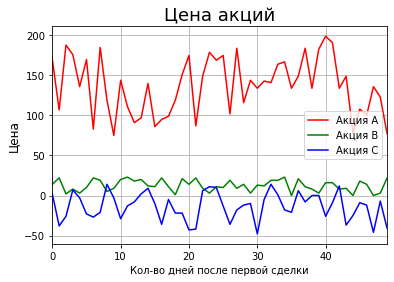

In [21]:
fig = plt.figure()
plt.plot(df1.index,df1['A'],label='Акция A', color='red')
plt.plot(df1.index,df1['B'],label='Акция B', color='green')
plt.plot(df1.index,df1['C'],label='Акция C', color='blue')
plt.xlabel('Кол-во дней после первой сделки', size=10)
plt.ylabel('Цена',size=12)
plt.legend(loc = 5)
plt.title('Цена акций',size=18)
plt.grid(b=True)
plt.xlim(0,49)
plt.show()

Мы также можем контролировать внешний вид линий. Matplotlib позволяет уточнить `linestyle` в качестве дополнительного аргумента; можно выбрать один из четырёх вариантов: `'-'`, `'--'`, `'-.'` и `':'`, которые представляют собой сплошные, штриховые, штрих-пунктирные и пунктирные линии соответственно. 

Давайте попробуем поиграться с нашими данными::

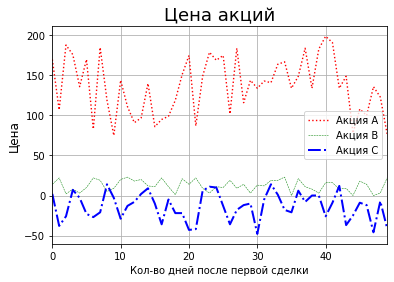

In [22]:
fig = plt.figure()
plt.plot(df1.index,df1['A'],':',label='Акция A', color='red',linewidth=1.4)
plt.plot(df1.index,df1['B'],'--',label='Акция B', color='green',linewidth=0.5)
plt.plot(df1.index,df1['C'],'-.',label='Акция C', color='blue',linewidth=2)
plt.xlabel('Кол-во дней после первой сделки', size=10)
plt.ylabel('Цена',size=12)
plt.legend(loc = 5)
plt.title('Цена акций',size=18)
plt.grid(b=True)
plt.xlim(0,49)
plt.show()

В случае ломаных линий, как на примере выше, для удобства можно отдельно выделить определенным маркером каждое наблюдение. Наиболее используемые маркеры: `"."` - точка,`","` - пиксель,`"o"` - кружок, `"D"` - ромб. В качестве альтернативы мы можем указать `linestyle` как `.-`, что выведет сплошную линию, маркированную точками. Для наглядности вернёмся к предыдущему примеру:

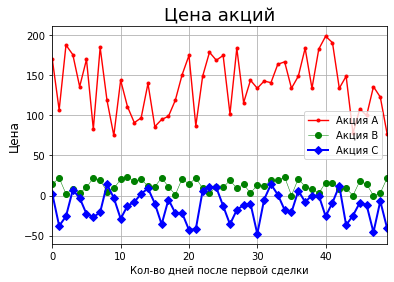

In [23]:
fig = plt.figure()
plt.plot(df1.index,df1['A'],'.-',label='Акция A', color='red',linewidth=1.4)
plt.plot(df1.index,df1['B'],label='Акция B',marker='o' ,color='green',linewidth=0.5)
plt.plot(df1.index,df1['C'],label='Акция C',marker='D', color='blue',linewidth=2)
plt.xlabel('Кол-во дней после первой сделки', size=10)
plt.ylabel('Цена',size=12)
plt.legend(loc = 5)
plt.title('Цена акций',size=18)
plt.grid(b=True)
plt.xlim(0,49)
plt.show()

Полный список маркеров можно найти здесь: https://matplotlib.org/api/markers_api.html

#### Сохранение графиков

Если нам отдельно понадобится тот или иной график, matplotlib позволяет сохранить любую диаграмму очень простым способом. Для этого необходимо заменить `plt.show()` командой `plt.savefig('filepath')`. Нужно отметить, что размер сохраняемого изображения по умолчанию довольно мал (864x720). Тем не менее, мы можем контролировать его, передав в функцию `plt.savefig()` дополнительный аргумент *dpi*.

Скорректируем и посмотрим на уже знакомый пример:

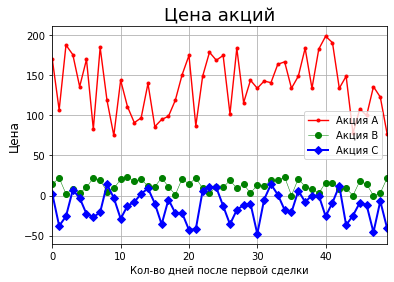

In [24]:
fig = plt.figure()
plt.plot(df1.index,df1['A'],'.-',label='Акция A', color='red',linewidth=1.4)
plt.plot(df1.index,df1['B'],label='Акция B',marker='o' ,color='green',linewidth=0.5)
plt.plot(df1.index,df1['C'],label='Акция C',marker='D', color='blue',linewidth=2)
plt.xlabel('Кол-во дней после первой сделки', size=10)
plt.ylabel('Цена',size=12)
plt.legend(loc = 5)
plt.title('Цена акций',size=18)
plt.grid(b=True)
plt.xlim(0,49)
plt.savefig('stock_prices.png') #сохраняет диаграмму в тот же директорий, где находится данный jupyter notebook,
# но можно указать и другой путь

#### Второстепенные диаграммы (subplots)

Одной из полезных особенностей библиотеки Matplotlib является возможность вывода сразу нескольких графиков на одно изображение. В частности, для создания такого изображения используется функция `gridspec`, позволяющая совмещать несколько диаграмм (мы называем их subplots). В качестве первого шага мы определяем, как именно будут расположены диаграммы на изображении - это осуществляется с помощью команды `GridSpec(rows,columns)`, где первый аргумент - число графиков по горизонтали (или число строк), второй - число графиков по вертикали (или число столбцов). Далее каждый график строится по отдельности с использованием функции `plt.subplot2grid()`; при этом необходимо каждый раз указывать его позицию на основном изображении. В общем виде синтаксис выглядит следующим образом:

`GridSpec(number of rows, number of columns)`<br>
`plt.subplot2grid((grid rows, grid columns), (plot row position, plot column position))`<br>
`plt.plot(x,y)`

Вернёмся к предыдущему примеру, но на этот раз попробуем построить два отдельных графика для Акции А и Акции В, но при этом поместим их на одном изображении так, чтобы они были друг над другом - это означает, что у нас две строки (два графика по горизонтали) и только один столбец. Позиции этих диаграмм будут `(0,0)` и `(1,0)` для Акции А и Акции В, соответственно (как и всегда, в Python отсчёт начинается с нуля, а не с единицы):

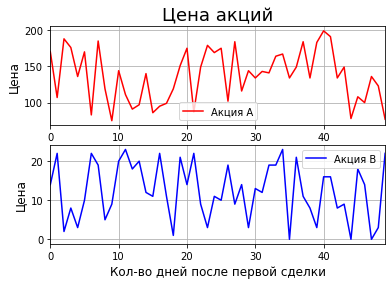

In [25]:
import matplotlib.gridspec as gridspec

fig = plt.figure()
# определяем размер изображения, указывая количество строк и столбцов 
gridspec.GridSpec(2,1)

plt.subplot2grid((2,1), (0,0))  # (2,1) = размер итогового графика, (0,0) = координаты  конкретно *этого* сабплота
plt.plot(df1.index,df1['A'],label='Акция A', color='red')
plt.xlabel('Кол-во дней после первой сделки', size=12)
plt.ylabel('Цена',size=12)
plt.legend()
plt.title('Цена акций',size=18)
plt.grid()
plt.xlim(0,49)

plt.subplot2grid((2,1), (1,0))
plt.plot(df1.index,df1['B'],label='Акция B', color='blue')
plt.xlabel('Кол-во дней после первой сделки', size=12)
plt.ylabel('Цена',size=12)
plt.legend()
plt.grid()
plt.xlim(0,49)

plt.show()

Конечно, мы можем создать гораздо более сложный layout, растянув графики сразу на несколько столбцов. 

Сейчас мы попробуем построить графики для всех трёх видов акций, но пусть график для Акции А будет иметь размер 2x2, под которым будут находиться графики для Акции В и Акции С, оба размера 1x1. Для того, чтобы "растянуть" первую диаграмму, необходимо указать это при её построении; так, в общем виде функция будет выглядеть следующим образом: 

`plt.subplot2grid((r1,c1),(px,py),colspan=n,rowspan=m)`

Вернёмся к нашему примеру:

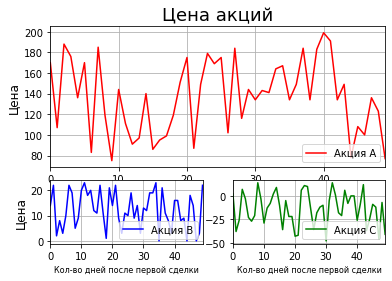

In [26]:
gridspec.GridSpec(3,2)

# Три строки, два столбца. Первый график - для Акции А - будет находиться на позиции (0, 0) и будет "растянут"
# на 2 строки и 2 колонки

# Графики для Акций B и С будут на позициях (2, 0) и (2, 1) соотвественно; 
# оба - нормального размера (1x1) и в половину ширины верхнего графика

plt.subplot2grid((3,2), (0,0), colspan = 2, rowspan = 2)  
plt.plot(df1.index,df1['A'],label='Акция A', color='red')
plt.ylabel('Цена',size=12)
plt.legend()
plt.title('Цена акций',size=18)
plt.grid()
plt.xlim(0,49)

plt.subplot2grid((3,2), (2,0))
plt.plot(df1.index,df1['B'],label='Акция B', color='blue')
plt.xlabel('Кол-во дней после первой сделки', size=8)
plt.ylabel('Цена',size=12)
plt.legend()
plt.grid()
plt.xlim(0,49)

plt.subplot2grid((3,2), (2,1))
plt.plot(df1.index,df1['C'],label='Акция C', color='green')
plt.xlabel('Кол-во дней после первой сделки', size=8)
plt.ylabel('',size=12)
plt.legend()
plt.grid()
plt.xlim(0,49)

plt.show()

### Seaborn

Seaborn - отличная библиотека для построения статистических графиков. Его синтаксис прост в использовании, а визуально графики выглядят намного лучше, нежели стандартные графики matplotlib. Главным же недостатком является то, что функционал seaborn несколько ограничен, и мы не имеем полного контроля над внешним видом графика. 

Тем не менее, лучше всего относиться к seaborn и matplotlib как к библиотекам, которые именно дополняют, а не замещают друг друга, поскольку обе имеют как сильные, так и слабые стороны. 

Для того, чтобы начать работу с библиотекой seaborn, конечно, необходимо импортировать её:

In [27]:
import seaborn as sns

Чтобы вам было легче освоить особенности seaborn, давайте начнем с визуализации простых данных. Для начала сгенерируем три выборки из нормального распределения; каждая выборка будет включать в себя по 10,000 наблюдений.

In [28]:
normal_data = np.random.normal(size=(10000, 3)) + np.arange(3) / 2

Поскольку мы уже посвятили много времени традиционным графикам (таким как диаграмма рассеяния, гистограмма, линейная диаграмма), попробуем попрактиковаться на статистических графиках. 

Очень часто в работе мы используем описательные статистики. Среднее, медиана, минимум, максимум и пр. - по этим показателям можно много что сказать о данных, с которыми мы работаем. Однако очень сложно оценить распределение датасета лишь по такому набору чисел. К счастью, seaborn позволяет построить очень полезный график - box plot, или "ящик с усами". Такой вид диаграммы в удобной форме показывает медиану, нижний и верхний квартили, минимальное и максимальное значение выборки и выбросы. Несколько таких ящиков можно нарисовать бок о бок, чтобы визуально сравнивать одно распределение с другим.

Давайте попробуем сначала построить ящик с усами на основе сгенерированных данных, а затем разберемся, как же он работает и из чего состоит:

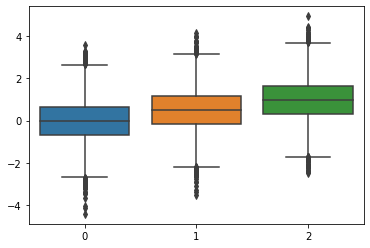

In [29]:
sns.boxplot(data = normal_data);

Итак, что же такое box plot? Box plot состоит из коробки (что можно понять из названия), усов и точек. Коробка показывает интерквартильный размах распределения, от первого до третьего квартиля. Горизонтальная черта внутри коробки обозначает медиану распределения.

**FYI:** Квартили разбивают упорядоченный датасет на четыре равные части. Первый квартиль, или Q1, равняется такой точке, значения меньше которой имеют 25% элементов датасета. Медиана - Q2; это значение, делящее датасет пополам. Третий квартиль, Q3, означает точку, значение которой выше значения 75% датасета. Соотвественно, межквартильный диапазон - это все, что находится между Q1 и Q3.

Усы же отображают весь разброс точек на расстоянии вплоть до 1.5 интерквартильного размаха (IQR) по обе стороны коробки. Математически говоря, в промежуток, заданный усами, попадают те значения, которые принадлежат отрезку $(Q1 - 1.5*IQR, Q3 + 1.5*IQR)$, где $IQR = Q3 - Q1$.

Для наглядности и лучшего понимания предлагаем посмотреть на простую картинку: 

<img src = "box_plot.jpg">

Помимо “ящиков с усами” есть много способов визуализировать распределение данных. Например, есть симпатичные графики, которые называются violin plots. Они чем-то похожи на box plots - по сути, это они есть, но в уменьшенном размере; помимо этого, с обеих сторон по бокам вертикально расположены плотности распределения.

Построим violin plots для наших данных:

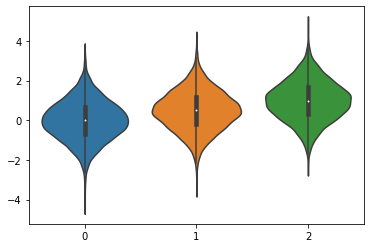

In [30]:
sns.violinplot(data = normal_data);

Может возникнуть логичный вопрос: а зачем такие графики нужны, есть у нас и так есть “ящики с усами”? 

Как мы выяснили ранее, box plots хорошо изображают описательные статистики и разброс значений, но не очень наглядно показывают особенности распределения данных. В случае, когда распределение сильно отличается от нормального, violin plot может быть более полезен, нежели “ящик с усами”, поскольку мы сможем лучше увидеть "странность" распределения наших данных.

**Бонус.** Если мы хотим, чтобы наши графики выглядели миленько, seaborn позволяет в любой момент поменять "дизайн" графика. На данный момент фигуры расположены на белом фоне, но при желании мы можем изменить стиль с помощью команды `sns.set_style()`. Посмотрим на пару примеров:

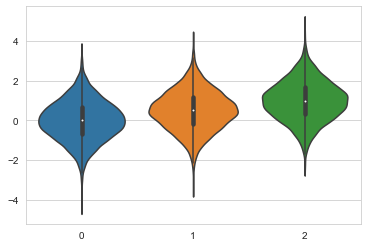

In [31]:
sns.set_style("whitegrid")
sns.violinplot(data = normal_data);

Любителям более тёмных цветов могут понравиться и такие тона фона:

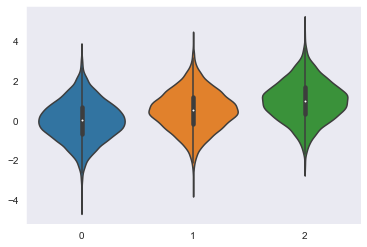

In [32]:
sns.set_style("dark")
sns.violinplot(data = normal_data);

Помимо этого, можно выбрать значения darkgrid и ticks.

Это лишь один из немногих способов контроля внешнего вида графика. Более подробно можно почитать здесь:
https://seaborn.pydata.org/tutorial/aesthetics.html

Наконец, рассмотрим последний, немного более сложный график - pair plot. Очень часто в случае обучения с учителем перед определением модели мы должны проверить те или иные предпосылки. Например, когда мы хотим построить линейную регрессию, мы должны убедиться в отсутсвии мультиколлинеарности - высокой корреляции между факторами. 

Pair plot же поможет нам посмотреть на одном изображении, как связаны между собой различные признаки. На диагонали матрицы графиков расположены гистограммы распределений признака. Оставшиеся графики — это простые scatter plots для соответствующих пар признаков. Так, с помощью scatter plot мы можем подтвердить или же отбросить предположение о корреляции определенной пары признаков. 

Помните самый первый датасет (искуственно сгенерированные цены акций)? Мы обратимся вновь к этим данным и попробуем построить pair plot:

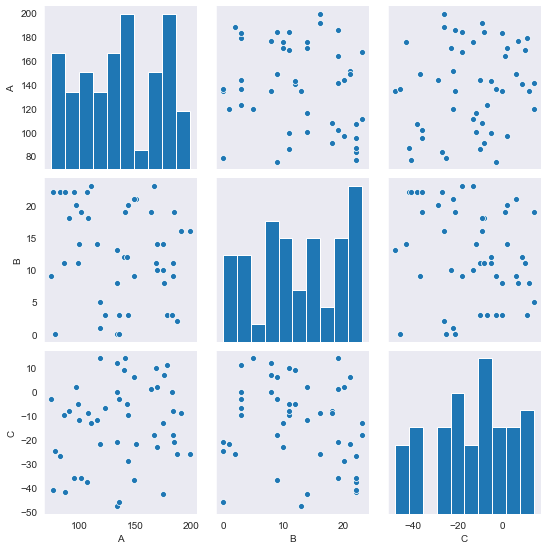

In [33]:
sns.pairplot(df1);

Как мы и упомянули, на диагонали находятся графики распределения, а по диаграммам рассеяния мы можем увидеть, как зависят между собой определенные пары признаков.

### Итоги

Итак, мы рассмотрели наиболее популярные виды традиционных и статистических графиков и попрактиковались в их построении, используя библиотеки matplotlib и seaborn. Поскольку объять каждый аспект визуализации данных абсолютно невозможно (тех же параметров, определяющих внешний вид графика, десятки, если не сотни), лучше всего для совершенствования навыков будет покопаться в документации, поизучать примеры визуализаций и попрактиковаться на разных датасетах - много хороших можно найти в kaggle.